# Training a YOLOv5 Model for Calanus Detection
This notebook presents the process of training a YOLOv5 model on custom data for Calanus detection based on tutorials from [Ultralytics](https://docs.ultralytics.com/yolov5/tutorials/train_custom_data/) and [Roboflow](https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/).

The notebook already shows the results of the training process; however, if you wish to try it yourself, please open the notebook in Google Colab and choose GPU in runtime (runtime &rarr; change runtime type &rarr; hardware accelerator &rarr; GPU).

## Install Dependencies
First, it is necessary to clone the [YOLOv5 GitHub repository](https://github.com/ultralytics/yolov5) from Ultralytics and install the dependencies for YOLOv5. 

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

Cloning into 'yolov5'...
remote: Enumerating objects: 15637, done.
remote: Counting objects: 100% (244/244), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 15637 (delta 123), reused 169 (delta 97), pack-reused 15393
Receiving objects: 100% (15637/15637), 14.64 MiB | 22.72 MiB/s, done.
Resolving deltas: 100% (10651/10651), done.
/content/yolov5
HEAD is now at 064365d Update parse_opt() in export.py to work as in train.py (#10789)


In [ ]:
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch
from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.6 MB/s eta 0:00:00


## Download Calanus Dataset from Roboflow
Since our dataset was annotated with Roboflow's annotation tool, it is possible to download it directly from Roboflow. 

In [ ]:
%%capture output
%cd /content/yolov5
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="VvJzTfA2l0Q7uzvphD7a")
project = rf.workspace("calanus-2").project("calanus-2")
dataset = project.version(3).download("yolov5")

## Train YOLOv5s 
Multiple versions of YOLOv5 exists, including the following (in ascending order by size):
- YOLOv5n
- YOLOv5s
- YOLOv5m
- YOLOv5l
- YOLOv5xl

Based on experimentation, we selected <b>YOLOv5s</b> since we did not see any significant improvement in precision or recall with the larger and more computationally expensive models. 

In [ ]:
%%time
%cd /content/yolov5/
!python train.py --img 640 --batch 32 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --name yolov5s_results  --cache

/content/yolov5
2023-05-06 04:22:58.514657: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 04:22:59.515361: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Calanus-2-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local

### View Training Visualisations
After training has finished, we can plot different learning curves to show the improvement over training steps (epochs) during training.

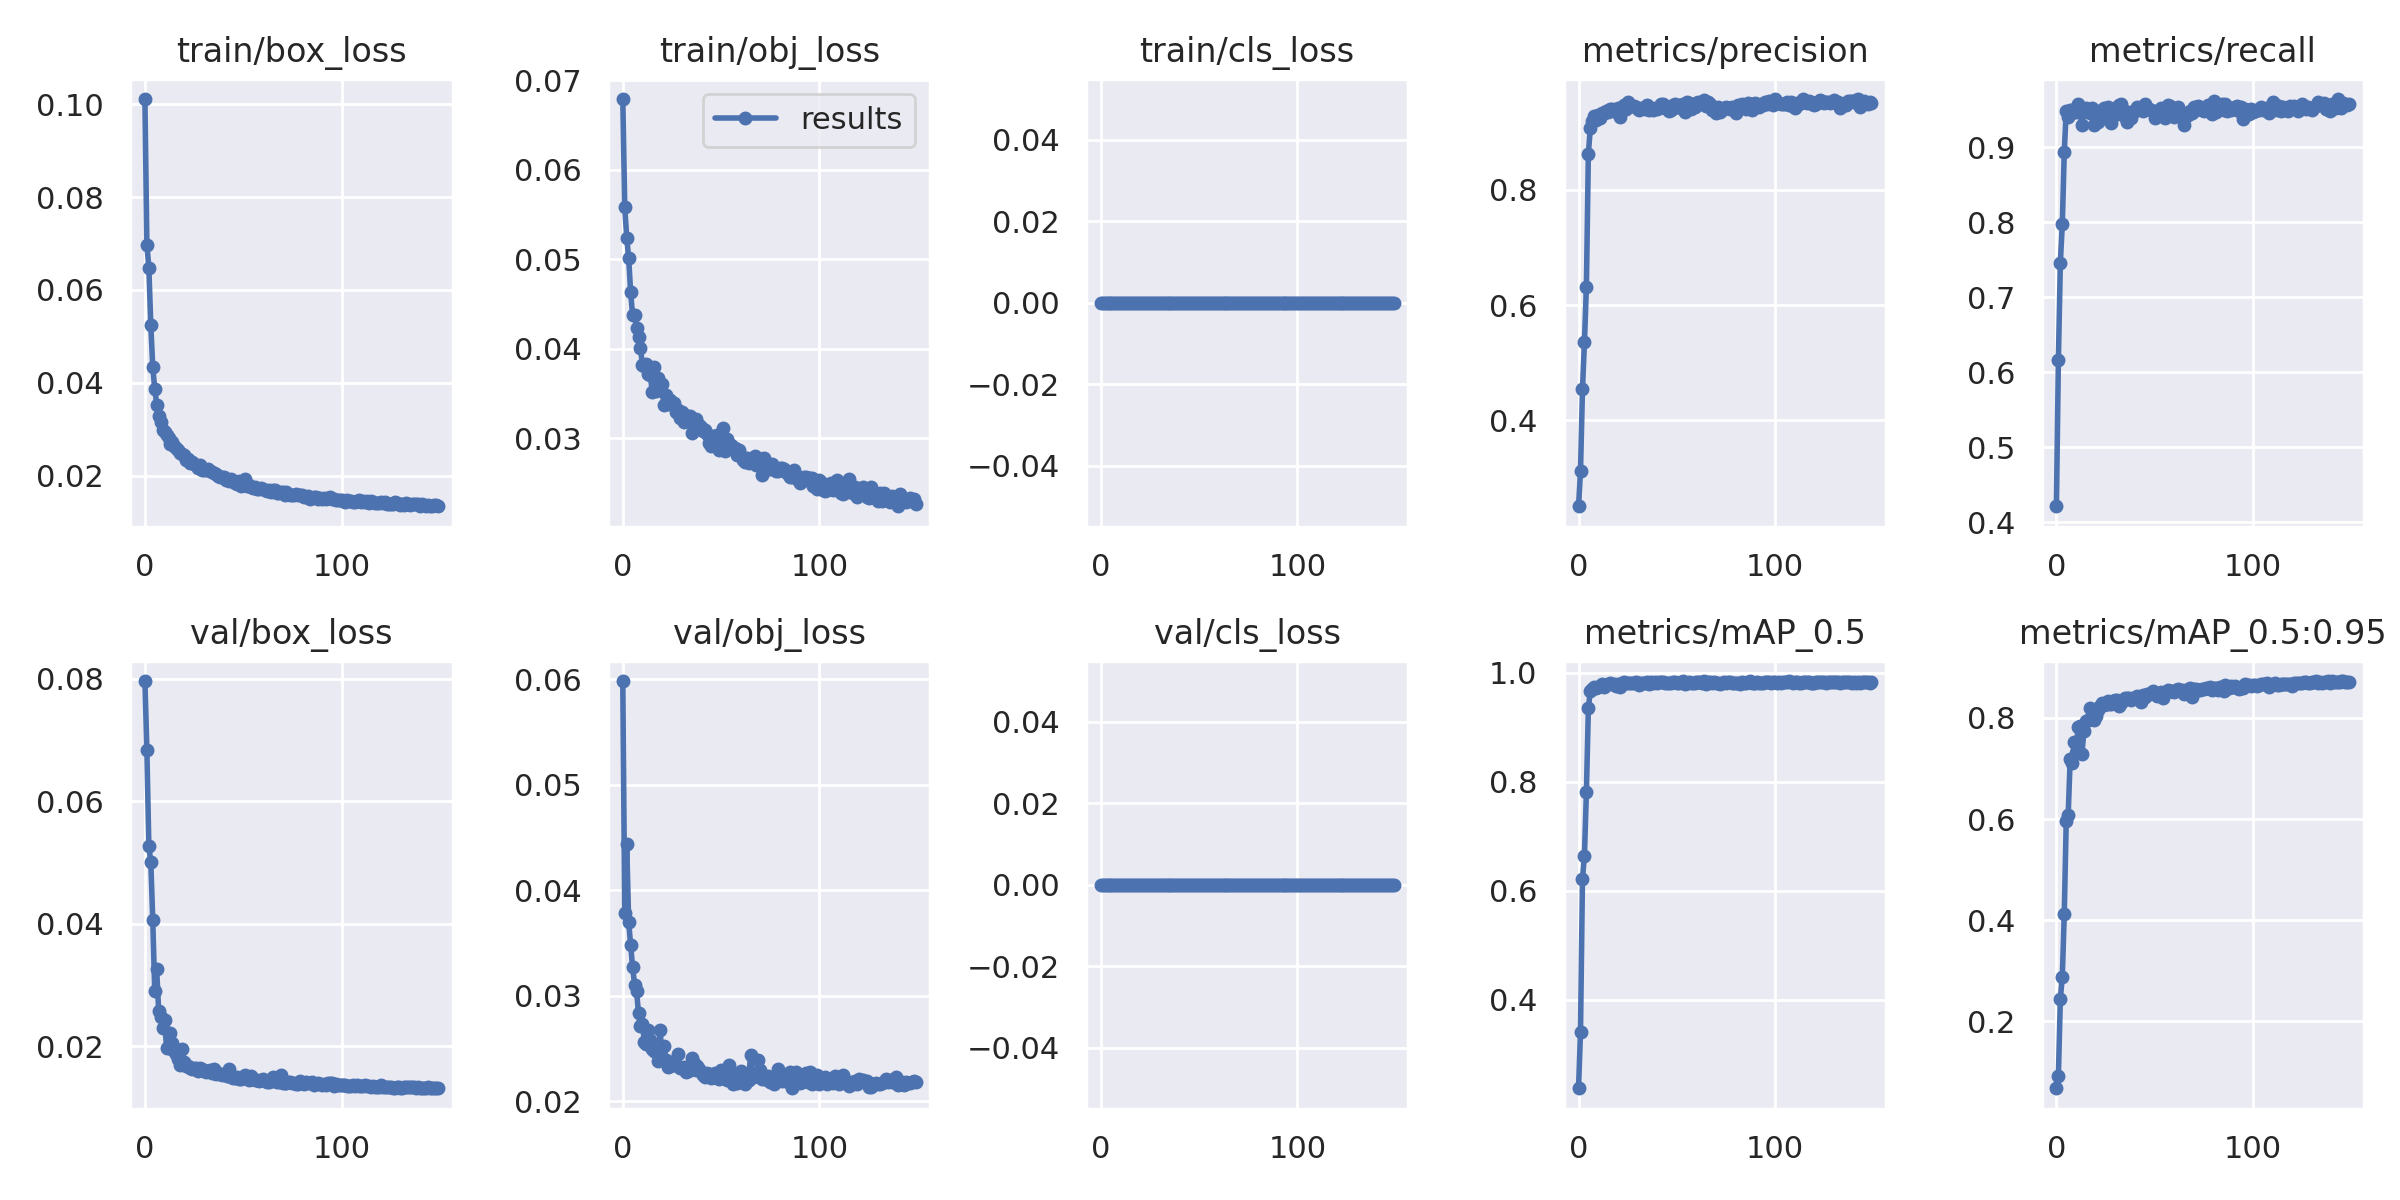

In [ ]:
from utils.plots import plot_results  
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)  

## Test Model on Unseen Images
Next, we can use the model to make predictions on the images in the test dataset. 

In [ ]:
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 640 --conf 0.85 --iou-thres=0.15 --source ../yolov5/Calanus-2-3/test/images

/content/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=../yolov5/Calanus-2-3/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.85, iou_thres=0.15, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/230 /content/yolov5/Calanus-2-3/test/images/A1_add_bat1_pos1_3_2_4_jpg.rf.6017255399f8cfed1b52075077c62890.jpg: 640x640 20 calanuss, 11.6ms
image 2/230 /content/yolov5/Calanus-2-3/test/images/A1_add_bat1_pos1_3_4_1_jpg.rf.91649e9ec4eda1a9506d19239f0ebf88.jpg: 640x640 22 calanuss, 11.6ms
image 3/2

The predictions can be displayed below. 

*Please note that the output of this cell as been deleted in order to meet the file size limit for uploading the notebook to GitHub.*

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): 
    display(Image(filename=imageName))
    print("\n")

### Evaluate Performance
Finally, we can evaluate the performance of our model on the test images by examining measures like precision and recall.

*NOTE: If you get an error, go to yolov5 &rarr; Calanus-2-3 &rarr; data.yaml and make the following amendment: "test: Calanus-2-3/test/images"*

In [ ]:
# default confidence and iou thresholds
!python val.py --data ../yolov5/Calanus-2-3/data.yaml --weights runs/train/yolov5s_results/weights/best.pt --task test --img 640

val: data=../yolov5/Calanus-2-3/data.yaml, weights=['runs/train/yolov5s_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/yolov5/Calanus-2-3/test/labels... 230 images, 54 backgrounds, 0 corrupt: 100% 230/230 [00:00<00:00, 1502.78it/s]
test: New cache created: /content/yolov5/Calanus-2-3/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 8/8 [00:28<00:00,  3.51s/it]
                   all        230       1968      0.942      0.958      0.982      0.873
Speed: 0.6ms pre

In [ ]:
# with 85% confidence and 15% iou thresholds
!python val.py --data ../yolov5/Calanus-2-3/data.yaml --weights runs/train/yolov5s_results/weights/best.pt --task test --img 640 --conf-thres=0.85 --iou-thres=0.15

val: data=../yolov5/Calanus-2-3/data.yaml, weights=['runs/train/yolov5s_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.85, iou_thres=0.15, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.85 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/yolov5/Calanus-2-3/test/labels.cache... 230 images, 54 backgrounds, 0 corrupt: 100% 230/230 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 8/8 [00:28<00:00,  3.54s/it]
                   all        230       1968      0.958       0.92       0.95      0.858
Speed: 2.9ms pre-proc

## Export the Model Weights
In order to use the model for deployment, the weights are exported to ONNX format and downloaded. 

In [ ]:
!python export.py --weights runs/train/yolov5s_results/weights/best.pt --include torchscript onnx

In [ ]:
from google.colab import files
files.download('runs/train/yolov5s_results/weights/best.onnx') 